In [1]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/MarsLanding_3dof_v1/Run/Run_1km


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


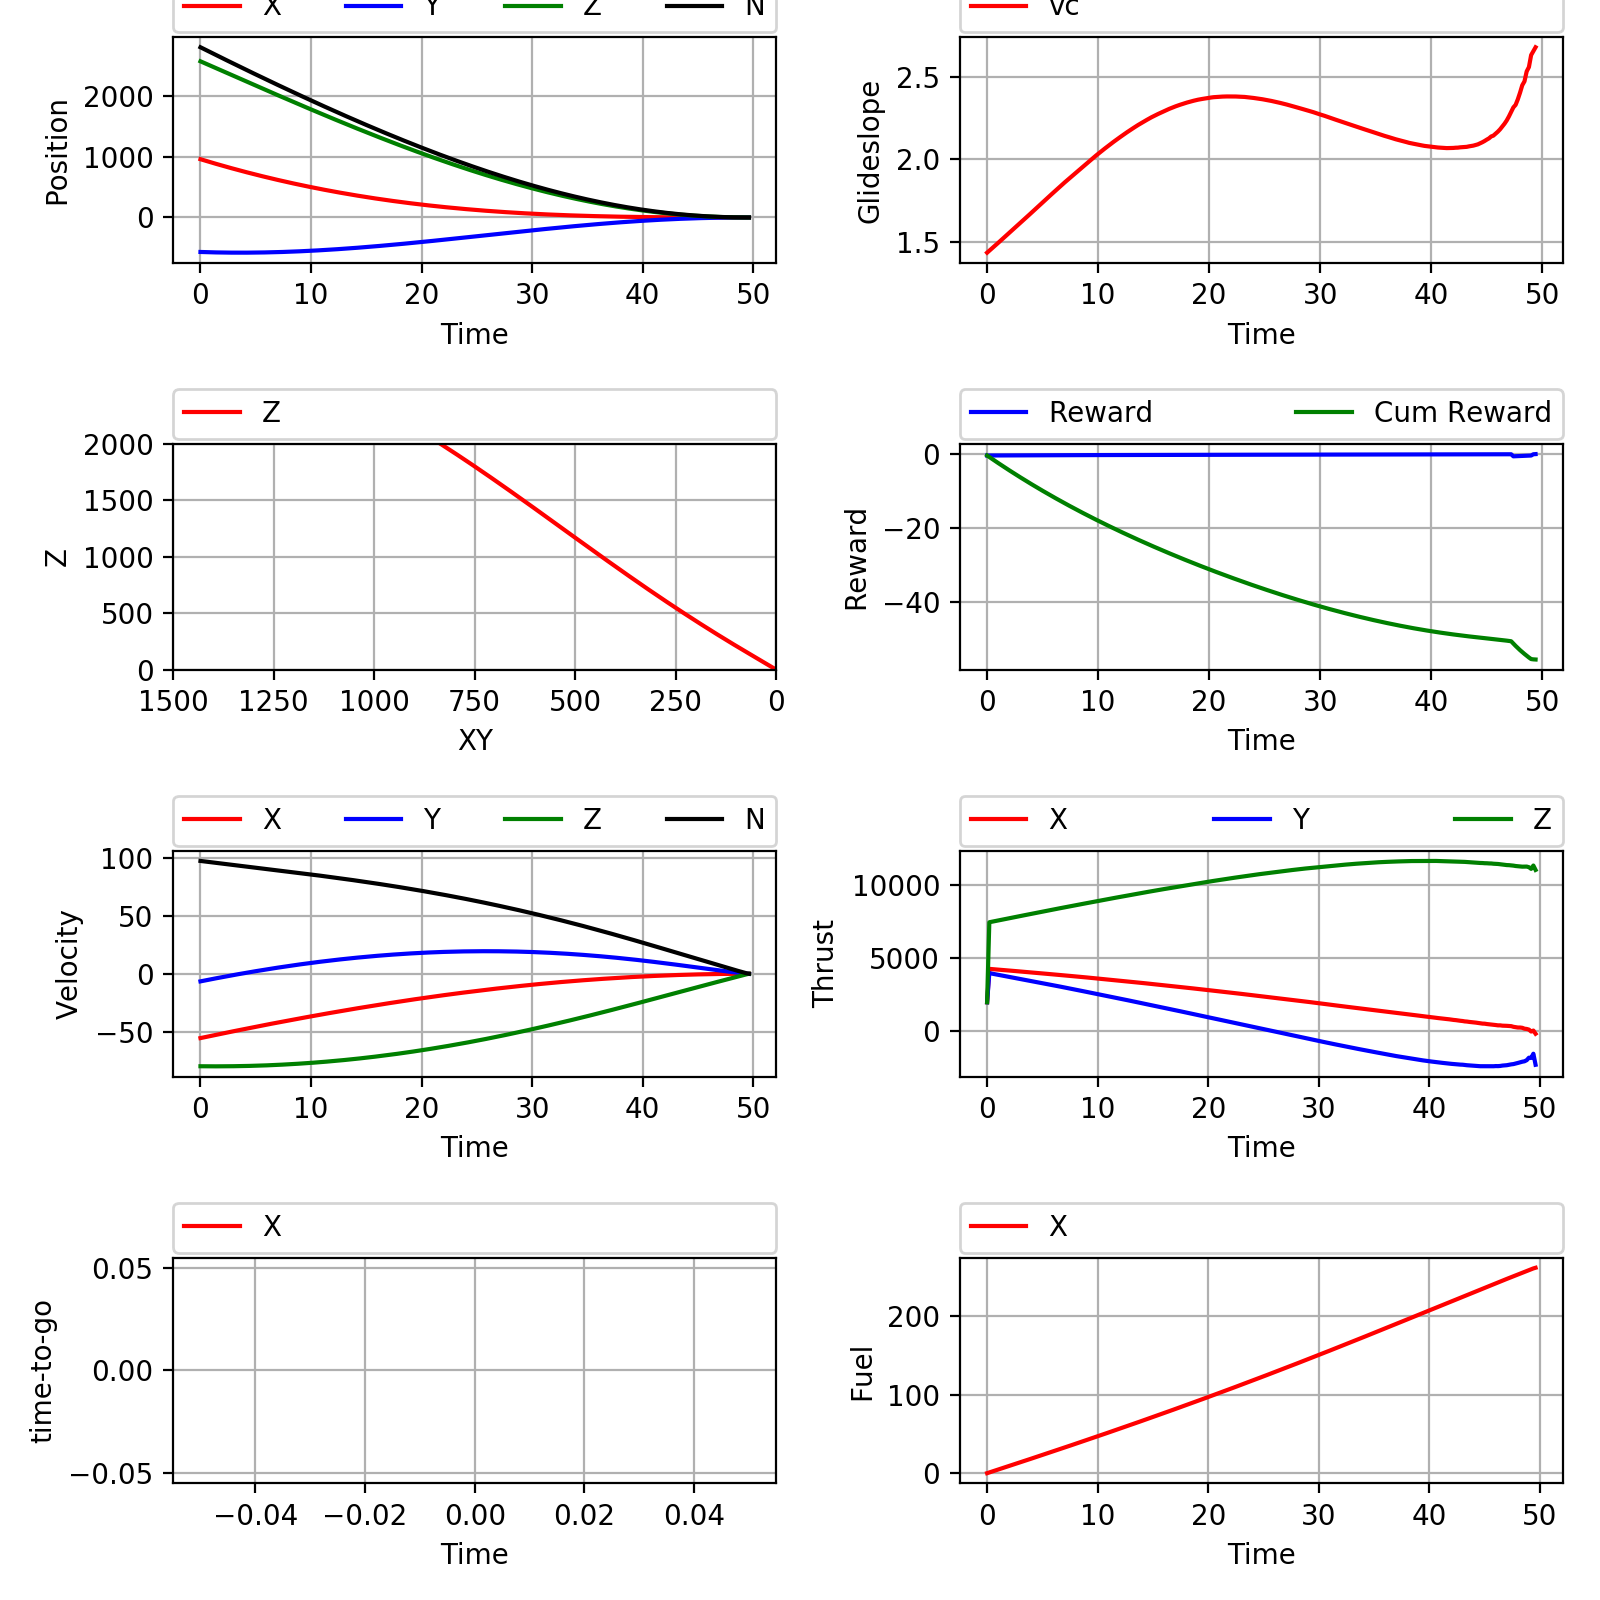

<IPython.core.display.Javascript object>


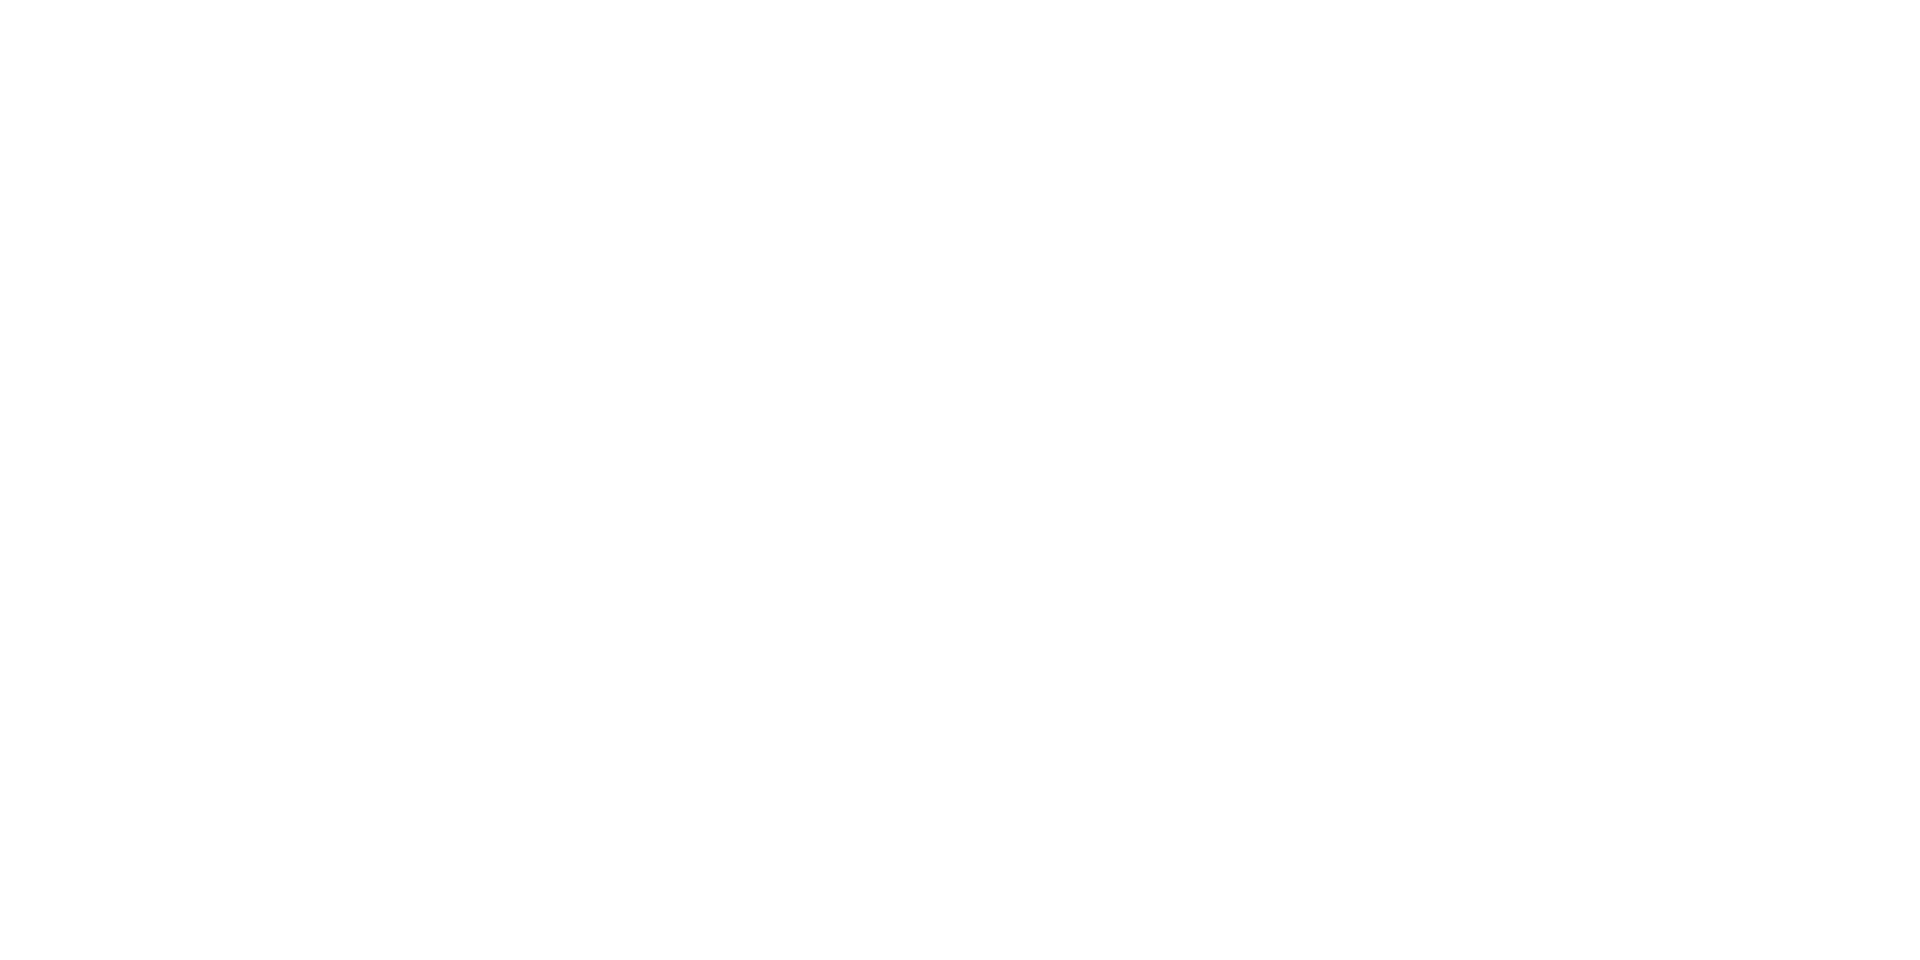

<IPython.core.display.Javascript object>


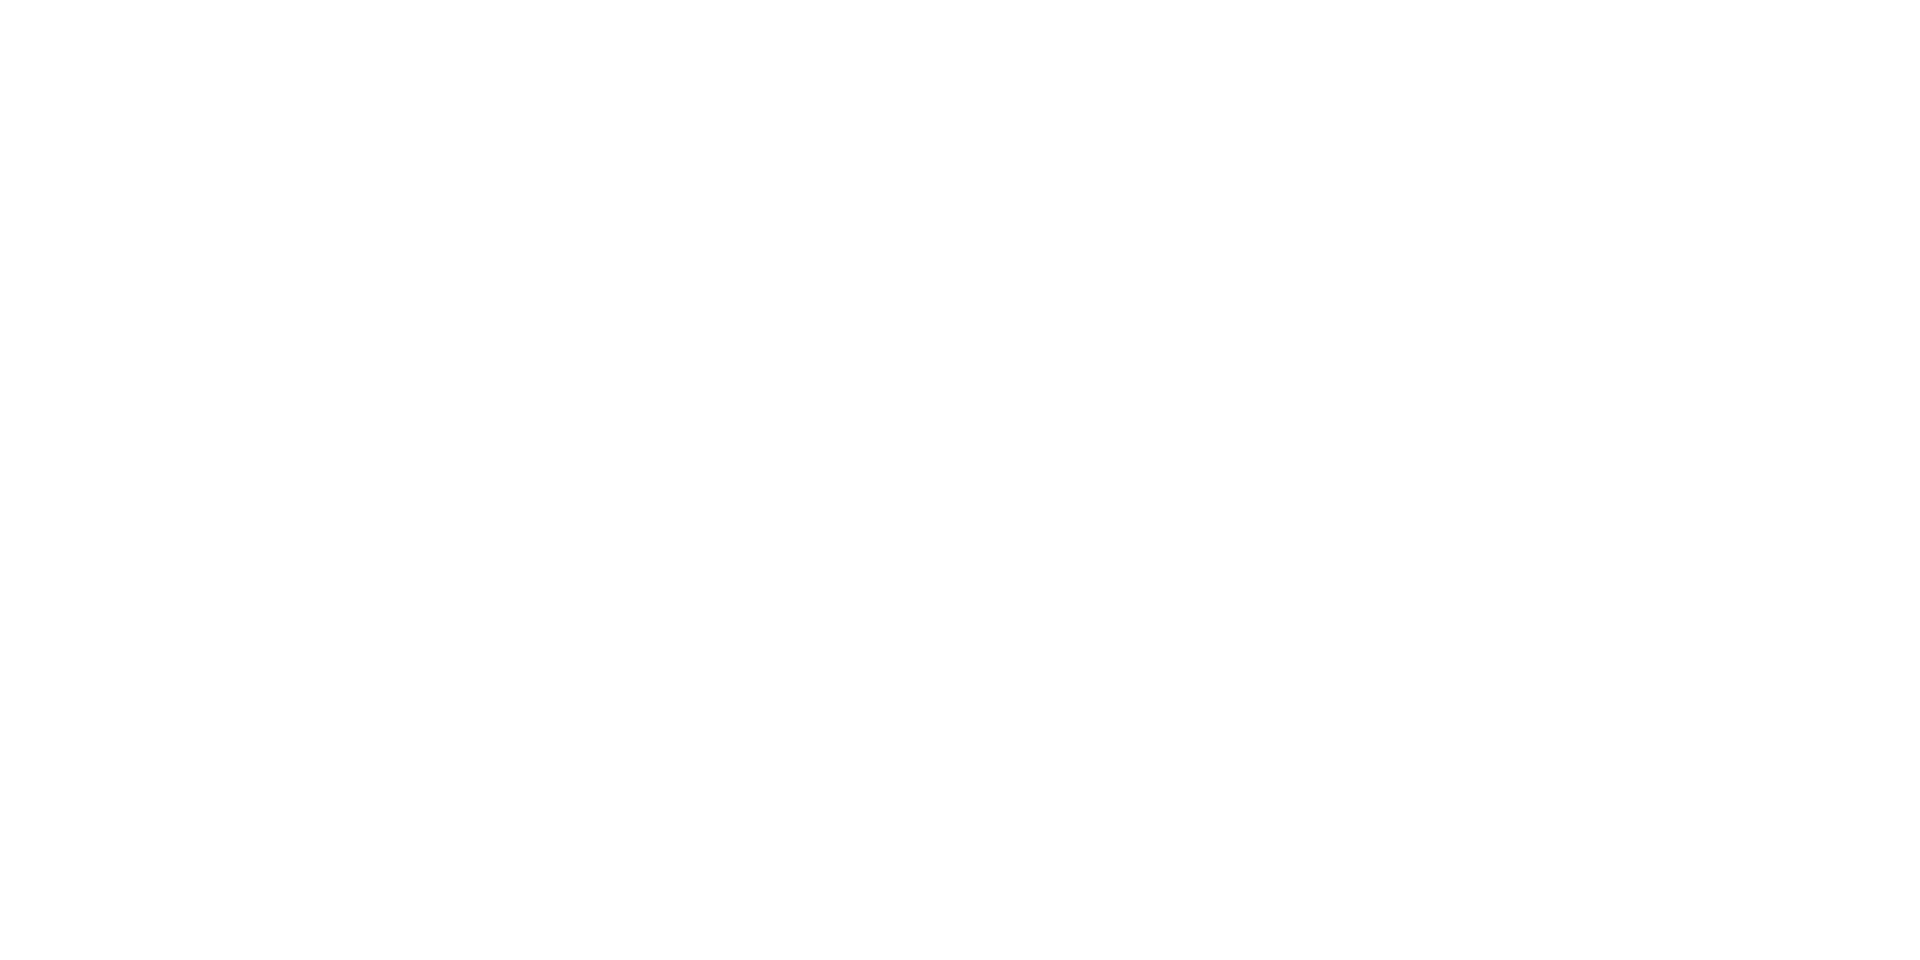

<IPython.core.display.Javascript object>


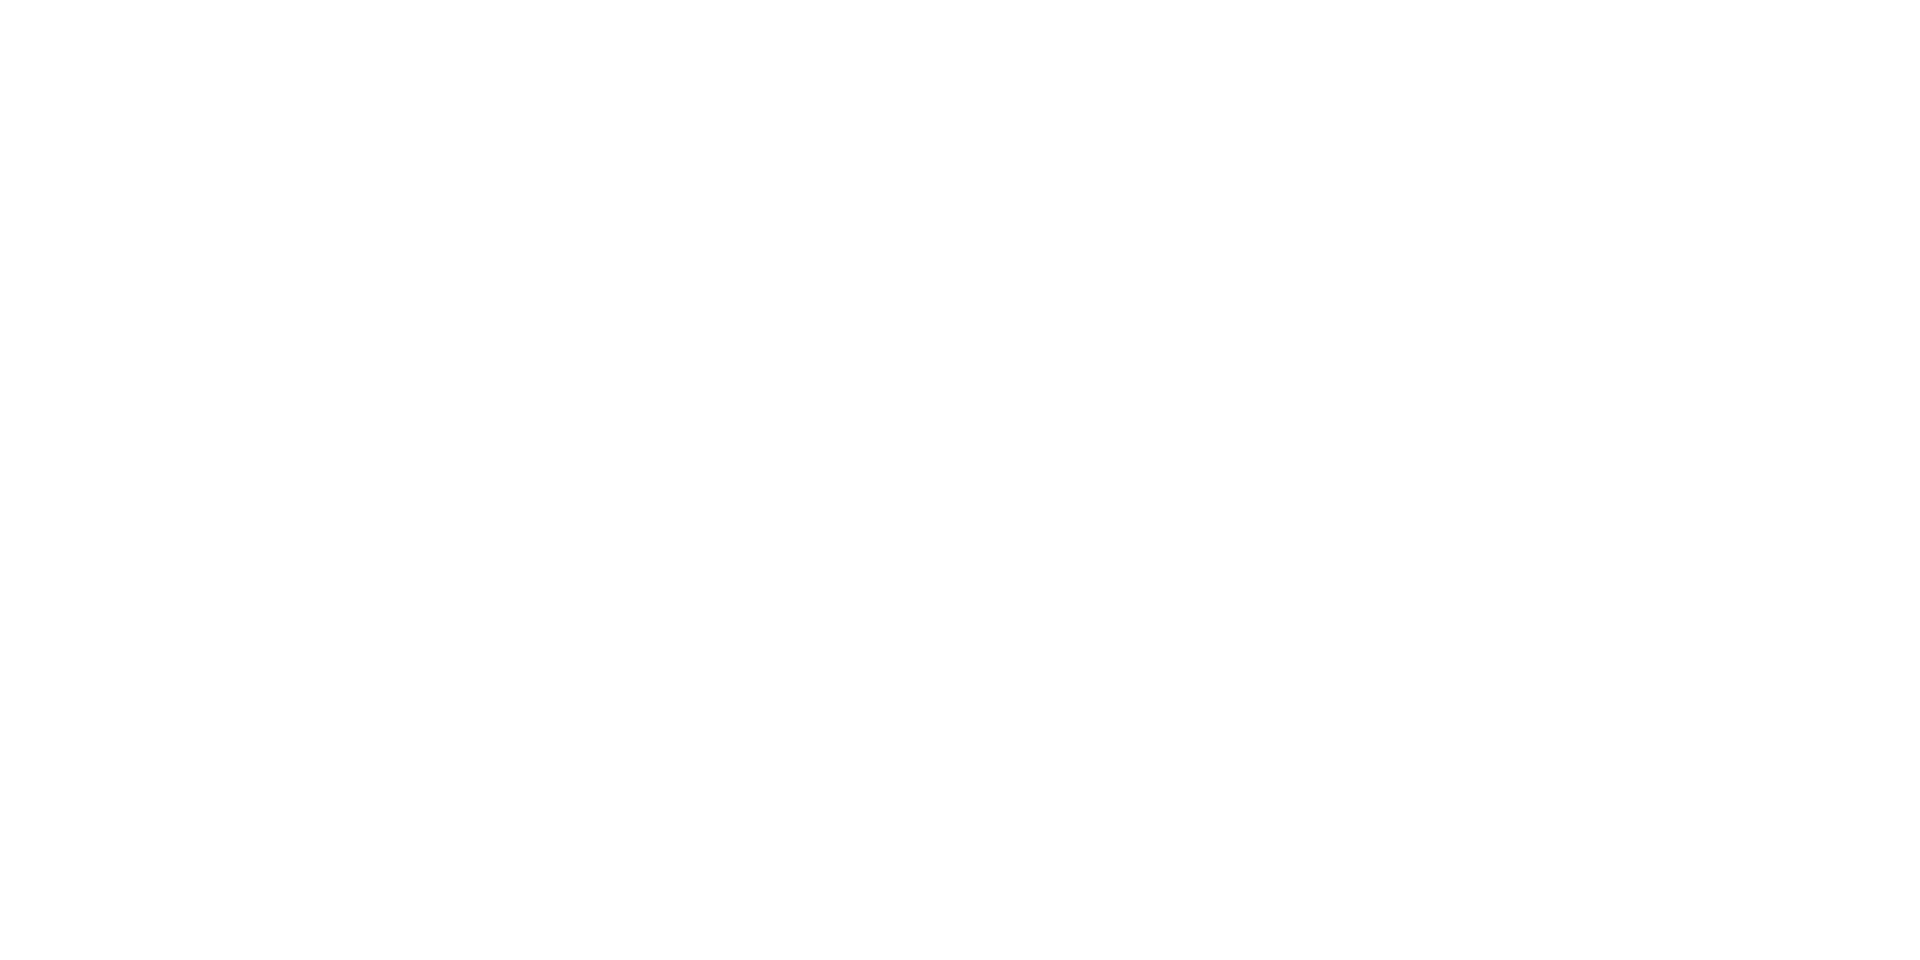

<IPython.core.display.Javascript object>


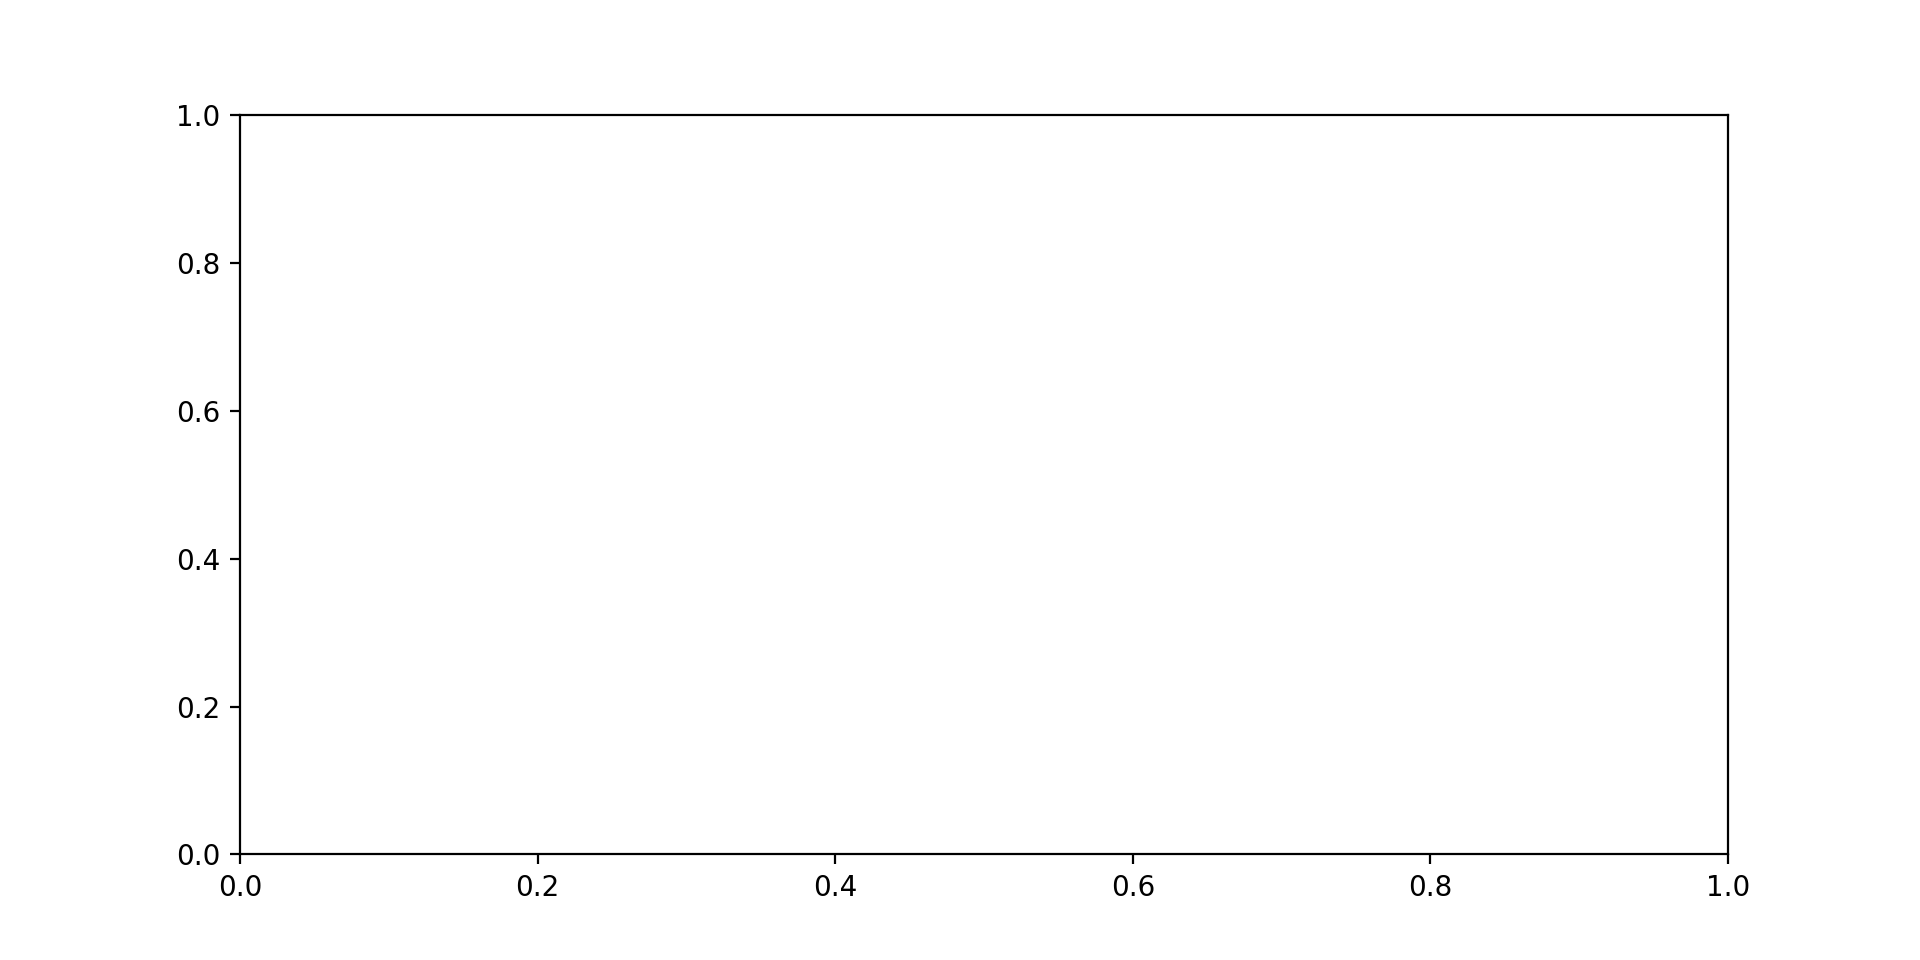

lander env new
Landing_icgen:
    downrange                   :  (0, 3000, -70, -10)
    crossrange                  :  (-1500, 1500, -30, 30)
    altitude                    :  (2400, 2600, -90, -70)
    adjust_apf_v0               :  True
248 0.003424218227501077 0.07067917586276946


In [11]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.0,0.0),noise_u=100,noise_sd=50, #u=1000 breaks
                          downrange = (0,3000 , -70, -10), 
                           crossrange = (-1500,1500 , -30,30),  
                           altitude = (2400,2600,-90,-70))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [12]:

pos,vel,traj=agent.test_batch(n=1000)

313 0.01007401469723595 0.20149427900268024
300 0.003058075774524541 0.023304778373990066
269 0.003026686183119034 0.19336658069196408
311 0.057776753203732344 1.1163883432974784
301 0.06531229499445221 1.0995596160643664
240 0.006856339667677939 0.174025371862222
252 0.005829715648849733 0.18203099561760774
310 0.003062842309819714 0.06443251095144827
289 0.013408099192589808 0.6077103954259329
272 0.006640452247720235 0.1176739260461518
291 0.0018013532708021824 0.042803194939886505
264 0.010923028706122613 0.4695015010598206
302 0.004861831364892608 0.6304534318161719
278 0.005868653369510587 0.38183346582842076
338 0.03546696868354131 0.44119214339712864
281 0.0021072405400805517 0.2166354341947657
255 0.0026516335705867693 0.0579196226015055
250 0.005780922906860804 0.09248491467099419
305 0.04190876705001137 0.5435106399830123
300 0.0014183431766807335 0.043174573975966656
254 0.016069578217921036 0.6900994962072774
298 0.022337823814128462 0.7374430468199297
290 0.01852297249908

260 0.04211308260259677 0.7870966695702394
313 0.016517187750171653 0.9084052974251514
312 0.06972161374036664 0.5671724730750859
269 0.005684854797396533 0.3876443094137756
282 0.001574779106010987 0.35487020437244465
247 0.008064264898596666 0.21920169880234394
241 0.00572196087041022 0.5952944009219401
292 0.012657148671270277 0.6210970492920995
266 0.029262760958656382 0.9732182499028298
282 0.016401287294838494 0.4302700031883702
247 0.0020328748834759344 0.06994430143663535
333 0.059234718428438755 1.0616207412092764
277 0.018586565949763798 0.6825424655026641
290 0.018242504071221764 0.375660719343424
248 0.013581667870642543 0.48385072757044395
291 0.02122817800260592 0.34364927132983414
303 0.004797583259080757 0.09598035716476516
258 0.007539399269419161 0.13309779826289797
239 0.004448387565238124 0.20794681684031632
255 0.008143897683698085 0.31165031724100095
311 0.00299345484504003 0.08106153904468093
319 0.03237853532997119 0.9945688052370395
258 0.008781203305604158 0.1

309 0.01491561366567512 0.4978066448469099
311 0.08990298858353458 0.6403860681634448
348 0.027667676054567908 0.09628361540651387
266 0.001730996456462756 0.06618515665854569
287 0.01727068739804186 0.48019719997445764
278 0.015111416767112069 0.6054864013409692
259 0.003931735049159244 0.24492979168593554
291 0.0042430062900699166 0.0777363838826547
249 0.0039014123877705526 0.06030184522766172
262 0.009383483340332784 0.18810681726156586
249 0.003940113870227555 0.08973274797287592
255 0.020700327533079398 0.37673720497555646
322 0.026075554047589836 0.7301750478418711
243 0.006858609630720814 0.4434349111827823
266 0.036427404226193234 0.011211061292658026
245 0.0036322220615266554 0.04370764775939672
244 0.007294957871079971 0.45124578665351855
261 0.01180607415758285 0.4724932260561334
280 0.014861260069881154 0.3215795940471159
327 0.02716507426229951 0.9460470083268432
241 0.015106805044010076 0.4817523853573532
277 0.011107567971829288 0.18613198172799736
313 0.008386144368973

245 0.00227415305747303 0.02907648447522724
321 0.029342957893964267 0.5891176056036108
308 0.03328288913043763 0.035050338407039645
238 0.012144254036297483 0.21480868681836937
337 0.07448079027618457 0.5824294637932621
291 0.02270016507663865 0.654805551945991
287 0.03291122945993526 0.5319861660788194
277 0.004183479524582352 0.07618363066498439
287 0.04602392269888401 0.05652452829639643
298 0.014973379906825538 0.3664437166932529
299 0.025703097740543367 0.41545262836621366
267 0.012515313652129352 0.2168693269964702
317 0.03315079800465612 0.7603778427712831
222 0.0012023234637984679 0.03373356330208686
263 0.019379852561855024 0.3129629109603597
359 0.02022115765444523 0.7192053703619576
238 0.020191490929529946 0.8703719943904673
265 0.010138276372298288 0.13563380832601973
240 0.006428734158911873 0.4928053811629737
321 0.005102230053882008 0.17549270656860652
245 0.0029841539372672714 0.06287192034539085
315 0.0018862916869951882 0.12056460667280644
250 0.001986497047638683 0

277 0.01184180834548954 0.4610021957678601
324 0.056473979919817625 1.0588143051546723
274 0.019124933252567936 0.4647191961162039
298 0.07980269542172842 0.20439287764964847
344 0.023093079959576854 0.6204716584511429
338 0.016895462023133582 0.2093240058291938
294 0.003028595995207511 0.6279366685973007
289 0.03623927756922889 0.5442745349292535
302 0.006676355071091681 0.3747497566846704
366 0.003884988073467238 0.44498114318266974
349 0.05476389735328315 1.0265687175963611
249 0.008257591680944462 0.18321050672589792
300 0.008651167801895801 0.17200267913717326
313 0.011331236969172046 0.144939006687918
310 0.005443189043380522 0.11732938476072476
306 0.013809257056204099 0.45085211096494027
244 0.014179411275055955 0.467843744000216
302 0.018129112936223372 0.7316867431922394
340 0.005990509592912379 0.11785570287174914
287 0.02592698223562768 0.5148548897735267
279 0.03242964490757561 0.3932048678049692
282 0.006792218907301414 0.08888196739575718
250 0.0029250898977354637 0.0535

257 0.0075957132062956555 0.17037031762325497
294 0.015731359999091782 0.6935535798288716
259 0.005107957088023388 0.08799459051578078
326 0.04799029447944274 0.7795838021027445
268 0.007526711613269214 0.34036120581515145
332 0.006449389111171256 0.18116918971537782
234 0.015340182737375785 0.48406177609081774
274 0.0026835250372284894 0.22793382834967105
277 0.0217315063082017 0.554189363650449
247 0.0019800732730970187 0.08420253610587897
309 0.006018405016531135 0.1902829132034721
332 0.001392833950792226 0.2184314971105861
294 0.021039175566905412 0.49268614859132187
320 0.04579677108669674 0.9892276267050373
253 0.011373253108522783 0.469773290664954
270 0.012922668685863907 0.47226542380515796
315 0.02216154228886507 0.7483378269805356
298 0.002534491887395535 0.10963183722551001
274 0.011207135181122525 0.14370280177974126
249 0.01773695102754744 0.36258908271345136
307 0.00786962326463792 0.11892072658106008
313 0.003418643195887643 0.05803525218851327
259 0.009381451639963652

In [15]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('min fuel: ',np.min(fuel))
print('std fuel: ',np.std(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

1001
0.11888267841182668 1.1364645353231
1:  [ 739.81953441  209.16913336 2573.6872071 ]
2:  [-27.99463969  14.32219487 -82.64574956]
3:  [ 0.10274026  0.05979931 -0.00125433]
4:  [ 0.60871497  0.35282406 -0.01046663]
mean fuel:  277.94484138756667
min fuel:  232.88611811472038
std fuel:  22.757599339505482
max fuel:  360.8035149008133
min GS:  0.22639845502976258
mean steps:  287.0969030969031
max steps:  384


In [11]:
foo = tl

1001
998


<IPython.core.display.Javascript object>


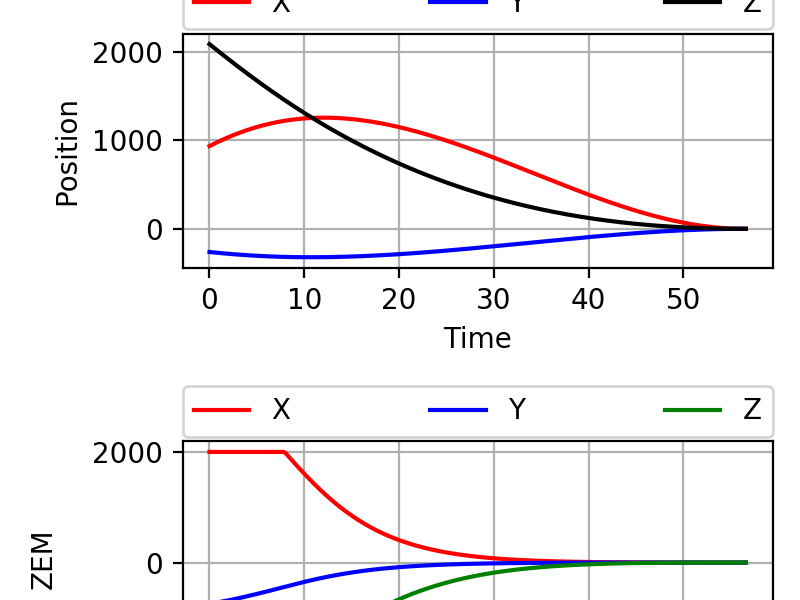

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


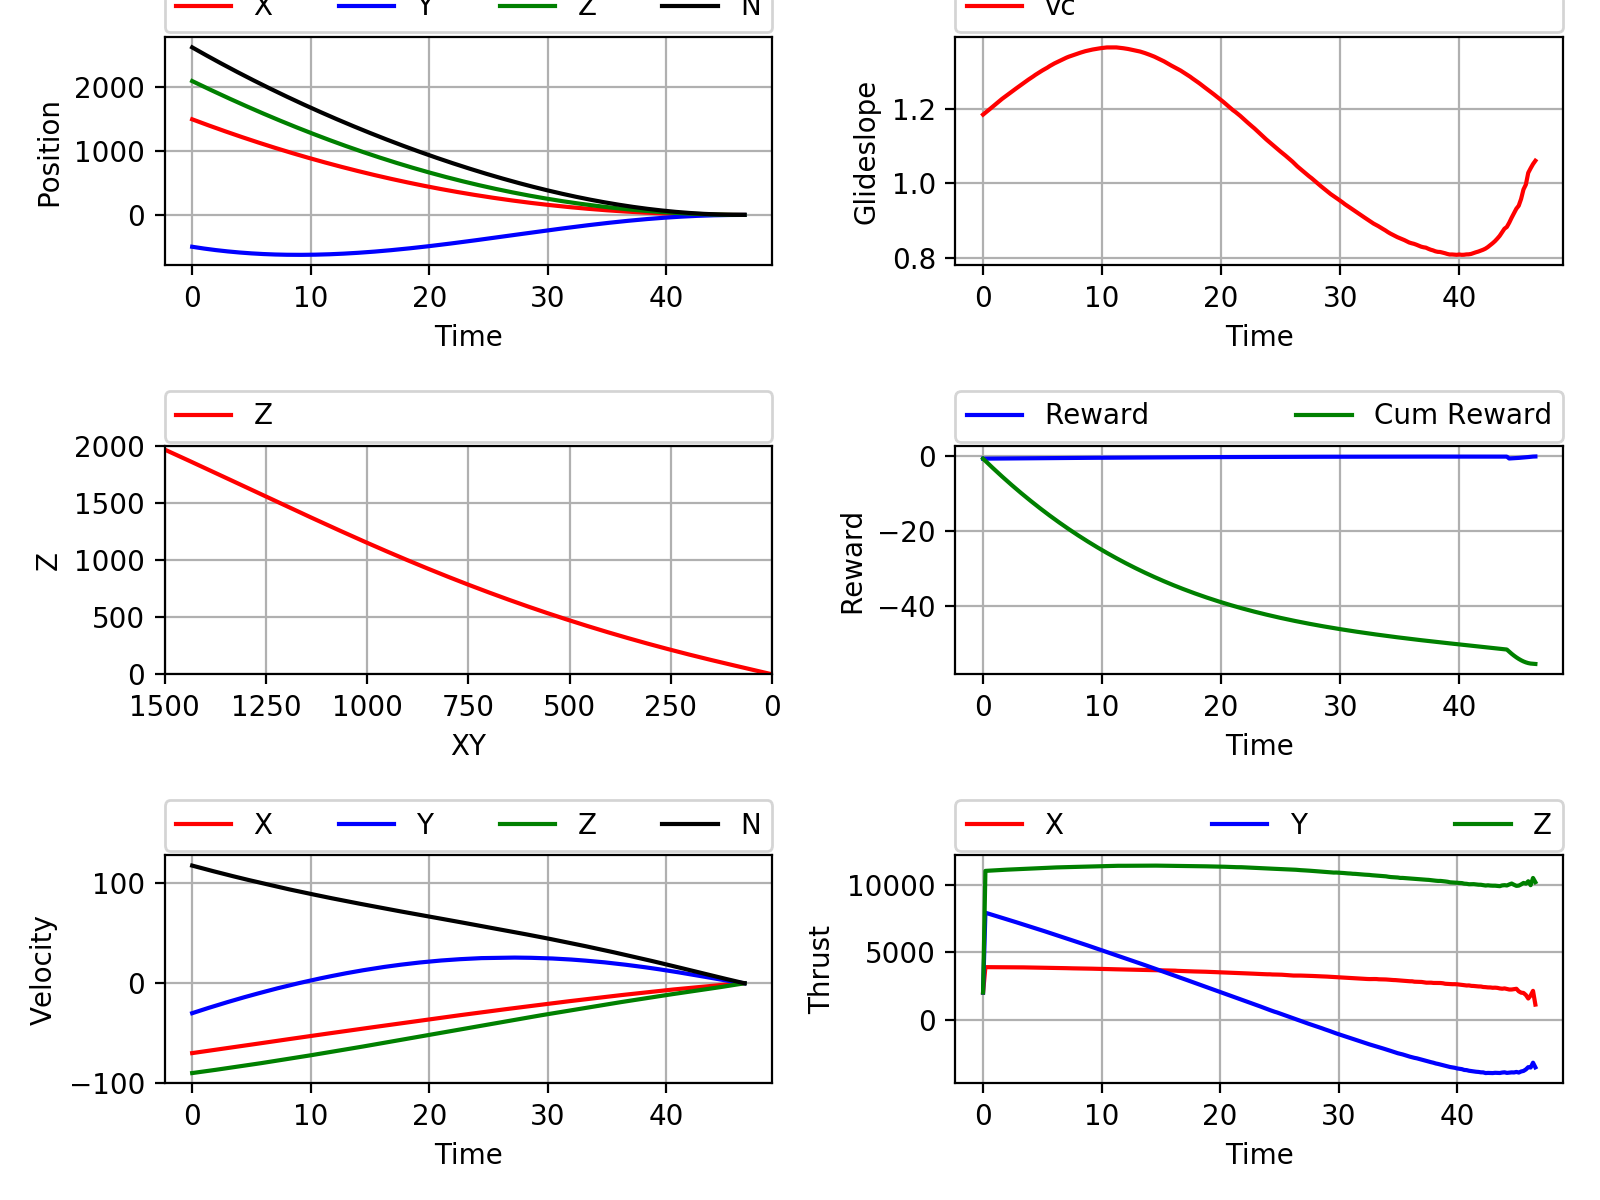

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()

<IPython.core.display.Javascript object>


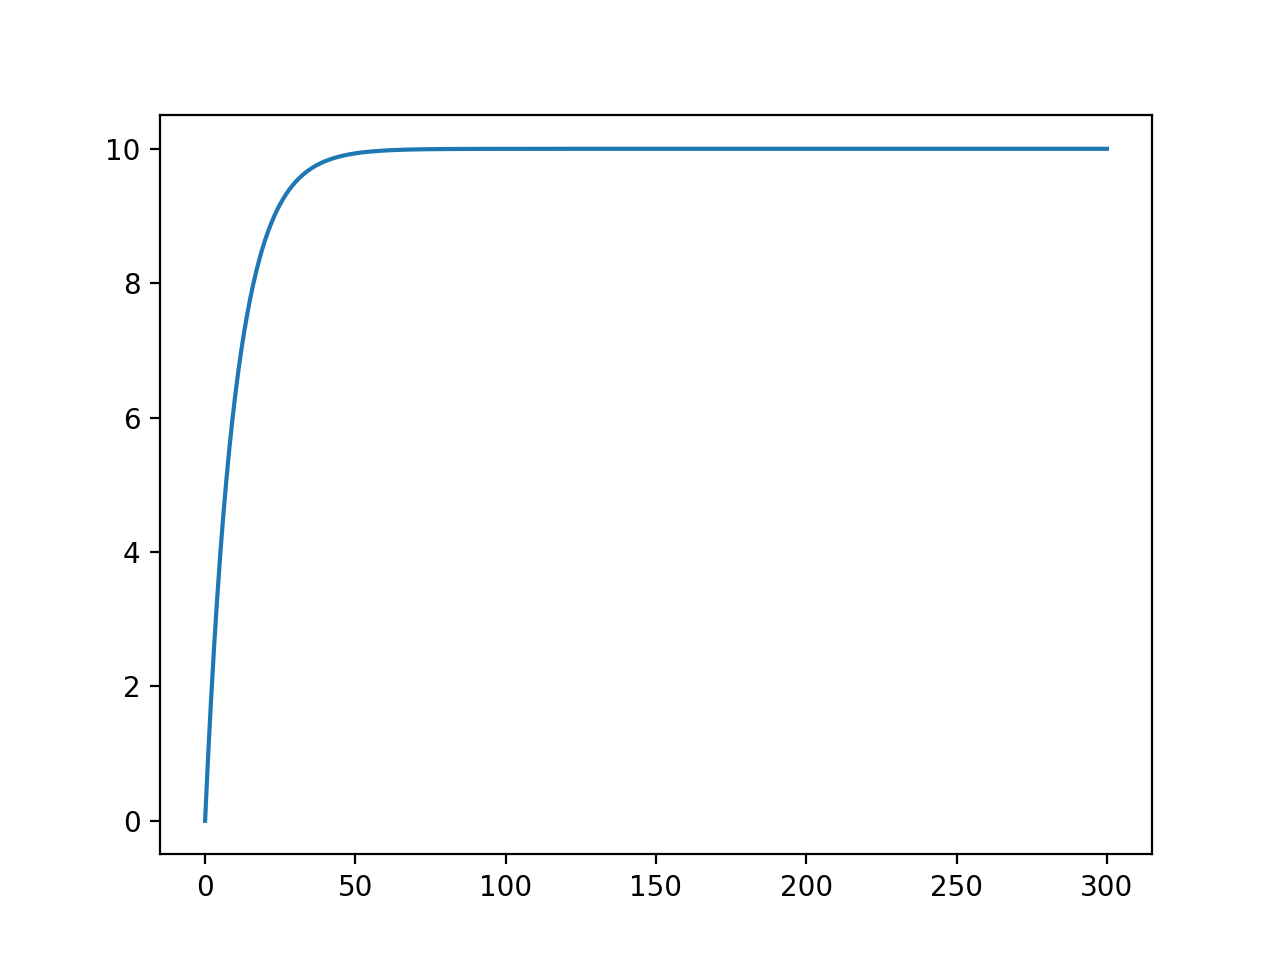

In [32]:
import matplotlib.pyplot as plt
xy = np.linspace(0,300,300)
tau = 10
atarg = 10*(1-np.exp(-xy/tau))
plt.figure()
plt.plot(xy,atarg)
plt.show()